<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [3]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [4]:
import pandas as pd

Import matplotlib


In [5]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [6]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

print(df.count())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [7]:
duplicatedrows = df[df.duplicated(keep=False)]

print(duplicatedrows.count())

print(duplicatedrows.head())

ResponseId             40
MainBranch             40
Age                    40
Employment             40
RemoteWork             28
                       ..
JobSatPoints_11        12
SurveyLength           32
SurveyEase             34
ConvertedCompYearly     4
JobSat                 10
Length: 114, dtype: int64
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

  

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [15]:
selected_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates_on_cols = df[df.duplicated(subset=selected_cols, keep=False)]

def count_identical_values(group):
    return (group.nunique() == 1).sum()

identical_values_analysis = duplicates_on_cols.groupby(selected_cols).apply(
    lambda group: pd.Series({
        'Identical_Columns': count_identical_values(group),
        'Total_Columns': len(group.columns),
        'Identical_Percentage': (count_identical_values(group) / len(group.columns)) * 100
    })
).reset_index()

identical_values_analysis.head()

/tmp/ipykernel_5349/1014063446.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  identical_values_analysis = duplicates_on_cols.groupby(selected_cols).apply(


,MainBranch,Employment,RemoteWork,Identical_Columns,Total_Columns,Identical_Percentage
0,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",4.0,114.0,3.508772
1,I am a developer by profession,"Employed, full-time",In-person,4.0,114.0,3.508772
2,I am a developer by profession,"Employed, full-time",Remote,4.0,114.0,3.508772
3,I am a developer by profession,"Employed, full-time;Employed, part-time","Hybrid (some remote, some in-person)",5.0,114.0,4.385965
4,I am a developer by profession,"Employed, full-time;Employed, part-time",In-person,4.0,114.0,3.508772


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment

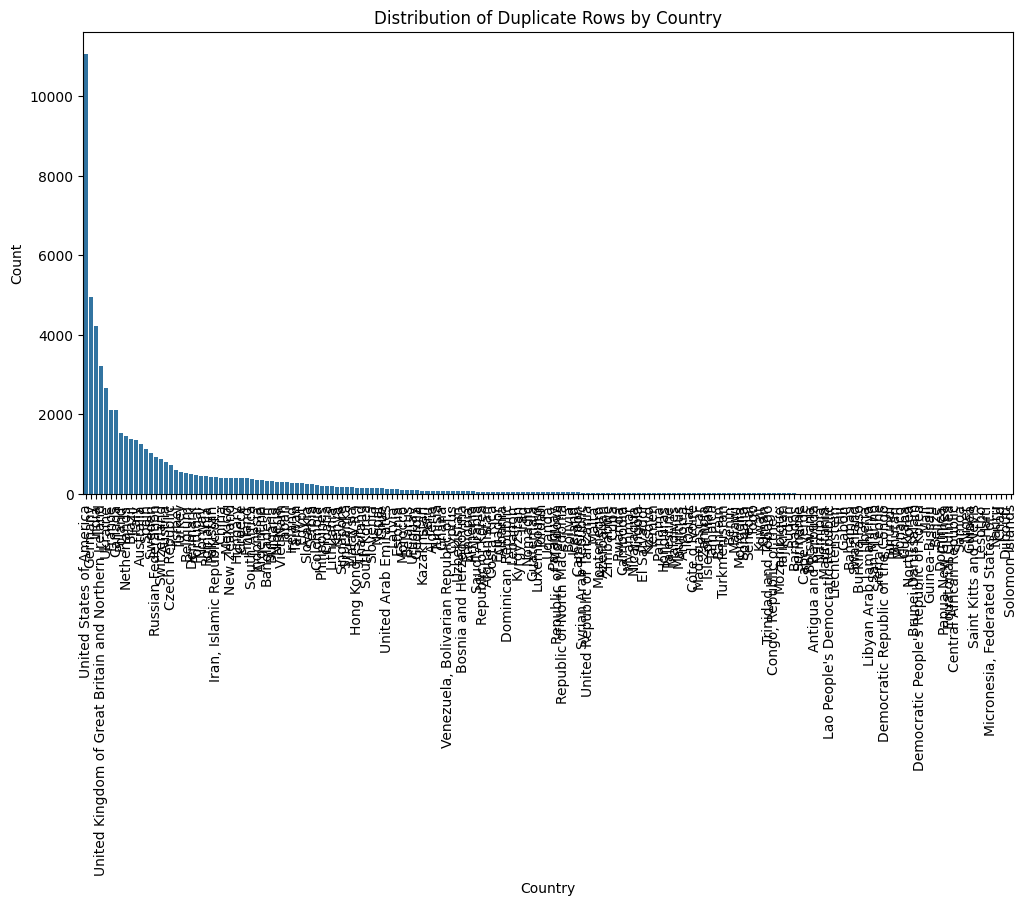

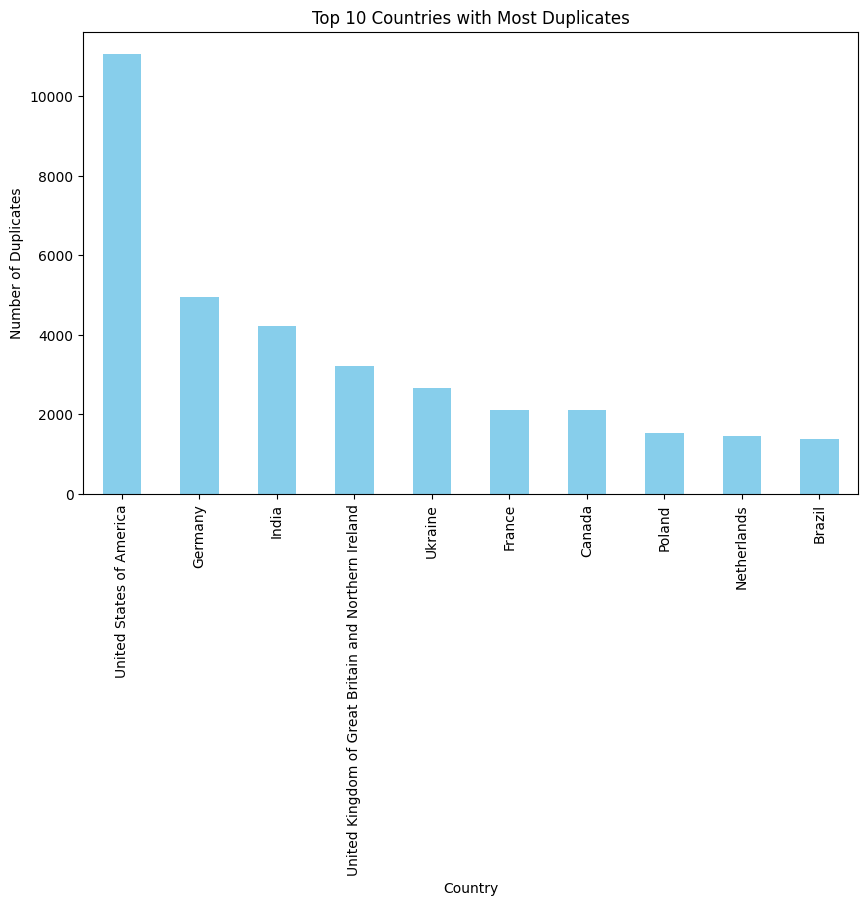

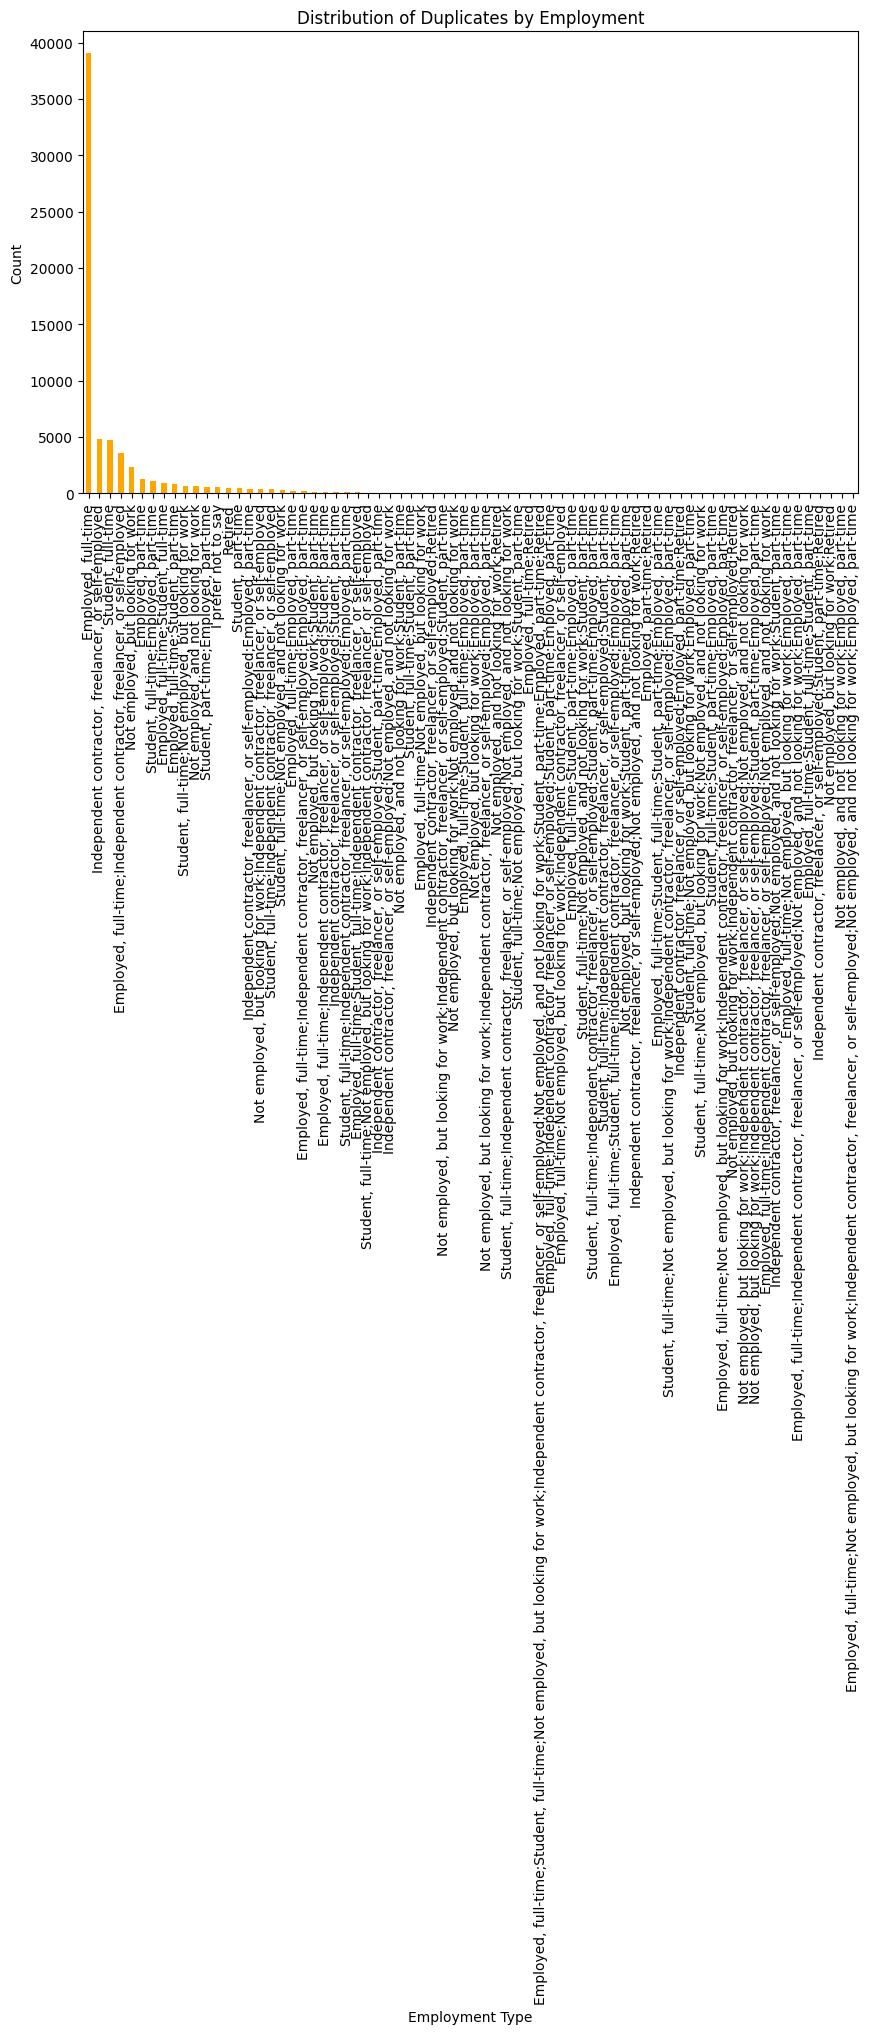

In [23]:
import seaborn as sns

duplicate_counts = duplicates_on_cols['Country'].value_counts()

plt.figure(figsize = (12,6))
sns.barplot(x = duplicate_counts.index, y = duplicate_counts.values)
plt.xticks(rotation=90)
plt.title("Distribution of Duplicate Rows by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

top_countries = duplicates_on_cols['Country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Duplicates")
plt.xlabel("Country")
plt.ylabel("Number of Duplicates")
plt.xticks(rotation=90)
plt.show()

employment_counts = duplicates_on_cols['Employment'].value_counts()
plt.figure(figsize=(10, 6))
employment_counts.plot(kind='bar', color='orange')
plt.title("Distribution of Duplicates by Employment")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [80]:
new_df = df.drop_duplicates()
new_df.count()

ResponseId             65437
MainBranch             65437
Age                    65437
Employment             65437
RemoteWork             54806
                       ...  
JobSatPoints_11        29445
SurveyLength           56182
SurveyEase             56238
ConvertedCompYearly    23435
JobSat                 29126
Length: 114, dtype: int64

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
